# January 17 Computer Lab
### Mariia Dzholos

- Overview on what we did last week
    - GitHub
    - The command line
    - jupyter notebooks
    - python intro
    
- Adjacency matrices 
- using `numpy`
- importing network data
- using [the package](https://networkx.org) `networkx` to visualize networks

## Last week's CL

### GitHub
We'll use GitHub-light: as a place to upload completed CL assignments, a place to collaborate with your group members, and as a general introduction to a service that is used a ton. 
Let's explore GitHub together. Ask any questions that come up as we do so.

### The command line
The command line is used to navigate/control your computer without clicking around. It's helpful in so many cases. One of the best parts about the command line (in my opinion) is that if you're ever unsure of how to do something/fix something/check something out on your computer, you can google "how to __ command line". You can change weird computer settings there, you can find and save old text messages from there, etc., etc.

#### `pip`
`pip` is a package manager that we use through the command line. It helps us install python packages easily by just typing `pip install package_name` into our command line. It checks that we have the correct dependencies and versions of everything needed to use the package, and it installs everything for us. 


### Jupyter Notebooks
I use jupyter notebooks for almost everything. If I have to write a big chunk of code to run on a remote server, but I want to debug it and play with it first, I do it here. If I want to take notes on a paper I'm reading, I do it here. I even write all my todo lists and my daily agendas in jupyter noteboks. And, obviously, I use them to teach!

I've found that when I have to write a lot of code, it feels intimidating for me to do it in a blank text file or in some IDE (integrated development environment: usually a desktop app that helps with creating, writing, formatting, and executing code). Jupyter notebooks feel so much more approachable to me-- it's easier to comment code, because you can type in markdown cells. It's easier to run tiny bits of code without having to make different files. It's nice to immediately see visualizations and be able to tweak them easily.

### Python
Python is a coding language that you can learn more about [in any of these tutorials](https://wiki.python.org/moin/BeginnersGuide/NonProgrammers). We won't be covering the philosophy or nitty-gritty details of python or of coding in general. Our focus is going to be on **building a specific toolset that we can use in practice**. While the gist of this specific toolset can be used generally, we'll be focusing on tools that will help us analyse networks.

As an introductory class with no prerequisites, there's a wide range of familiarity with coding and with coding in Python.

<img src="python_familiarity.png" width = 900>

I'm hoping that today's exercise has something in it for everybody! If you're new to python, please tell me if you're overwhelmed. If this is old hat, please read the optional challenge questions.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Matrices and `numpy` arrays

Imagine we have a table of values:

**<div align="center"> What did you eat yesterday?</div>**

| Name | Number of sandwiches eaten | Number of grapes eaten | Number of cookies eaten |
| --- | --- | --- | --- |
| Izabel | 3 | 24 | 6 |
| Anoma | 2 | 8 | 3 |
| Brandi | 1 | 0 | 15 |
| Emmott | 2 | 11 | 3 |

If we wanted to represent this table as a _matrix_, it would look like this:

$$\begin{bmatrix} 3 & 24 & 6 \\ 2 & 8 & 3 \\ 1 & 0 & 15 \\ 2 & 11 & 3 \end{bmatrix}$$

Notice that the row and column names are now implied rather than being explicit as they are in the table. It's still important to maintain an understanding of _what_ a matrix represents, and oftentimes this means having discipline-specific experts to collaborate with.

## Creating a matrix using `numpy`
In the following chunk of code, we'll create a `numpy` array named `Ate_Yesterday` to represent the matrix we defined above.

In [2]:
Ate_Yesterday = np.array([ [3, 24, 6], [2, 8, 3], [1, 0, 15], [2, 11, 3] ])

print(Ate_Yesterday)

[[ 3 24  6]
 [ 2  8  3]
 [ 1  0 15]
 [ 2 11  3]]


If we were worried about remembering what the name of the columns or rows of the table were, we could create arrays to help us:

* each raw is seperated by a come

In [3]:
columns = np.array([ 'Sandwiches', 'Grapes', 'Cookies' ])
rows = np.array([ 'Izabel', 'Anoma', 'Brandi', 'Emmott' ])

### Zero-indexing in Python
If you've never used python before, a really important thing to know is that _everything_ is "zero-indexed". This means that the _first_ of any list or array is the "zero-th" element. 

So if we wanted to know the first row in the table, we would type `print(rows[0])`

In [4]:
print(rows[0])

Izabel


### Accessing and editing elements of a matrix

What if we wanted to know how many cookies Anoma ate yesterday? Since Anoma is the _second_ row in the table, we know her corresponding row in the matrix is `1`. Since cookies are the _third_ column in the table, we know the corresponding column in the matrix is `2`. In math, we'd say we want to know the (1,2) element of the matrix. To do so, we would type `print( Ate_Yesterday[1,2])`.

In [5]:
print(Ate_Yesterday[1, 2])

3


* to access an element of a matrix
* row number always goes first, the column number always goes second

When we type brackets `[]` next to the matrix, we are telling python we want to access some value of the matrix. Notice that the row number always goes first, and the column number second. In this same way we can rewrite elements of the matrix!

Let's say that I realized I had mis-counted and remembered that I actually ate 14 cookies yesterday. If we wanted to update our matrix to reflect this (without re-creating the entire thing!) we could do so by re-writing the (0, 2) element of the matrix:

In [6]:
Ate_Yesterday[0, 2] = 14
print(Ate_Yesterday[0, 2])

14


What if I wanted to know everything that Emmott ate yesterday? I _could_ ask to print each individual element of their corresponding row by typing `print(Ate_Yesterday[3, 0], Ate_Yesterday[3, 1], Ate_Yesterday[3, 2])`. This is a bit annoying! Another approach would be to use what I like to call the "all-symbol" in python, `:`. If I wanted to print _all_ of Emmott's row, I could instead type `print(Ate_Yesterday[3, :])`!

In [7]:
print(Ate_Yesterday[3, 0], Ate_Yesterday[3, 1], Ate_Yesterday[3, 2])

print(Ate_Yesterday[3, :])

2 11 3
[ 2 11  3]


We can use the "all-symbol" for columns, too! If I wanted to know how many grapes each person ate yesterday, I could write `print(Ate_Yesterday[:, 1])`

In [8]:
print(Ate_Yesterday[:, 1])

[24  8  0 11]


## Printing the shape of a matrix
What if we want to make sure what the size of our matrix is? Use the `np.shape()` function.

In [9]:
np.shape(Ate_Yesterday)

(4, 3)

If you want to know the length of a one-dimensional array or a list, an easy way to do this is by using the `len()` function.

In [10]:
len(columns)

3

## Initializing a matrix
What if I don't know what values I want in my matrix, but I want to create it so it's easier to fill in later? To do this, it's nice to use the `zeros()` function. To use it, you just need to type `np.zeros( (n,m) )` where `n` is the number of rows you'd like to have and `m` is the number of columns.

In [11]:
empty = np.zeros( (4,3) )
print(empty)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


This is a good technique for initializing a matrix that will be _sparse_ (meaning: have lots of zeros in it). Then, I can _edit_ the entries of the matrix which are nonzero. 
For example, if I want to represent the following matrix:
$$\begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}$$
then I can edit the corresponding entries of our `empty` array above.

In [12]:
empty[0, 2] = 1
empty[2, 1] = 1
empty[3, 0] = 1
print(empty)

[[0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Saving a numpy array
Sometimes we might want to save our `numpy` array, so that we don't have to re-type everything we did to initialize it. If we save it, we can use it in other notebooks, across different files, and even if we restart our "Kernel" somehow.

If we know we're just going to use our array/matrix with `numpy`, we can save it as an `.npy` file. If we want to save it in a more general format, we can save it as a `.csv` file. `.csv` stands for "comma separated values, and files of this type can be opened with excel, numbers, or read by any other programming language.

In [13]:
np.save('Ate_Yesterday', Ate_Yesterday)
np.savetxt('Ate_Yesterday.csv', Ate_Yesterday)

# Adjacency matrices

Imagine there's a group of 7 people; Felicity, Solomon, Bradley, Minton, Silus, Shauna, Merika. If we asked them all, "Are you friends with X?" and represented their answers as a table, it might look something like this:

| |Felicity | Solomon | Bradley | Minton | Silus | Shauna | Merika |
|--- | --- | --- | --- | --- | --- | --- | --- | 
Felicity | | Y | N | Y | N | Y | Y 
Solomon | Y | | Y | N | Y | N | Y |
Bradley  | N | Y | | N | Y | Y | Y |
Minton   | N | Y | Y | | N | N | Y |
Silus  | Y | Y | N | Y | | Y | N |
Shauna | N | Y | N | N | Y |  | N |
Merika | Y | Y | N | N | Y | Y |  |      


If we changed all the "Yes" values in the table to "1"s and all the "No" values to "0"s, it would look like this,

| |Felicity | Solomon | Bradley | Minton | Silus | Shauna | Merika |
|--- | --- | --- | --- | --- | --- | --- | --- | 
Felicity | 0 | 1 | 1 | 1 | 0 | 1 | 1 | 
Solomon | 1 | 0 | 1 | 0 | 1 | 0 | 1 |
Bradley  | 0 | 1 | 0 | 1 | 1 | 1 | 1 |
Minton   | 0 | 1 | 1 | 0 | 0 | 0 | 1 |
Silus  | 1 | 1 | 0 | 1 | 0 | 1 | 0 |
Shauna | 0 | 1 | 0 | 0 | 1 | 0 | 0 |
Merika | 1 | 1 | 0 | 0 | 1 | 1 |  0|    

If we made the above table into a matrix, it would look like, 

$$\begin{bmatrix}  0 & 1 & 1 & 1 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 1 & 0 & 1 \\ 0 & 1 & 0 & 1 & 1 & 1 & 1 \\ 0 & 1 & 1 & 0 & 0 & 0 & 1 \\ 1 & 1 & 0 & 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 1 & 0 & 0\\  1 & 1 & 0 & 0 & 1 & 1 &  0\end{bmatrix}$$

Like we talked about last week, this is our _adjacency matrix_ that represents the friendship network for these 7 people.

## TASK: 
Make a numpy array called `friends` to represent this network using an adjacency matrix. Save the array as a `.npy` file called `friends.npy`.

In [14]:
friends = np.zeros( (7,7) )
print(friends)

friends[0, 1] = 1
friends[0, 2] = 1
friends[0, 3] = 1
friends[0, 5] = 1
friends[0, 6] = 1
friends[1, 0] = 1
friends[1, 2] = 1
friends[1, 4] = 1
friends[1, 6] = 1
friends[2, 1] = 1
friends[2, 4] = 1
friends[2, 5] = 1
friends[2, 6] = 1
friends[3, 1] = 1
friends[3, 2] = 1
friends[3, 6] = 1
friends[4, 0] = 1
friends[4, 1] = 1
friends[4, 3] = 1
friends[4, 5] = 1
friends[5, 1] = 1
friends[5, 4] = 1
friends[6, 0] = 1
friends[6, 1] = 1
friends[6, 4] = 1
friends[6, 5] = 1
print(friends)
np.save('friends', friends)


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0.]]


### _Challenge Part I_
If you have extra time:
* make an array called `names` to keep track of the names of the people in this social network, so that we can know that person 0 is Felicity, Person 1 is Solomon, and so on.
* Above we accessed elements of the matrix using indices. `Ate_Yesterday[2, 1]` told us how many grapes Malcolm ate yesterday. Can you think of a way to access elements of the matrix just using the lists `columns` and `rows`, the names `Izabel`, `Anoma`, `Brandi`, and `Emmott`, and the food items `Sandwiches`, `Grapes`, and `Cookies`? 
* Adapt your code so that we can access the elements of the adjacency matrix above just using the `names` array and the names of the friends above.

# Importing network data
Above, we discussed saving network data as an adjacency matrix in either a `.npy` or `.csv` format. In reality, there are LOTS of ways that network data can be saved. We won't get into the details of these other formats, but you can imagine that using `numpy` to represent networks is only one way to do so-- if we were still using Python, we could use `pandas` or `scipy`. Instead of using Python, we could use R or Stata or ... or! 

Furthermore, sometimes networks are saved according to their corresponding **edge list**. To see why that might be the case, consider the social network above. There are $7\times7 = 49$ entries in the matrix, but only 27 edges. Edge lists save the important information about where edges exist, whereas adjacency matrices save this information _and_ the complementary information about where edges _don't_ exist. 


This is all to say that we're only learning a smidge of the possible ways that networks can be saved/represented. I'm mentioning this so that if you encounter a network dataset online that doesn't look like what you're used to, that's totally normal. I'll make sure that the networks you all analyse are saved as `.csv` files representing the corresponding adjacency matrices. 

## Importing `.csv` files
Lets import our BFF network from the first day of class, which I've saved in the file `math1010_network.csv`. 

In [15]:
folder = ""
file = "math1010_network"
ext = ".csv"
BFF_Adjacency = np.genfromtxt( folder+file+ext )
print(BFF_Adjacency)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

## Importing `.npy` files
I also have the file saved as a `.npy` file. Below we're rewriting the `BFF_Adjacency` array we created below. In practice, we should just do one or the other of these, not both. We're doing both here so you can see the syntax for loading in `.csv` and `.npy` files. 

In [16]:
folder = ""
file = "math1010_network"
ext = ".npy"
BFF_Adjacency = np.load( folder+file+ext )

In [17]:
np.savetxt('math1010_network.csv', BFF_Adjacency)

# Using `networkx`

## Create a Network Object

In order to use the amazing tools in the `networkx` library, we first have to create a network object. There's a lot going on behind the scenes of this function, but basically it's defining the _nodes_ and _edges_ given by the adjacency matrix.

There _are_ other ways to define a network using `networkx`. However, since it's common to receive network data through an adjacency matrix in a `.csv` file, I've found this method for defining a network to be most useful.

In [20]:
BFF_Network = nx.from_numpy_array(BFF_Adjacency, create_using=nx.DiGraph)

## Determine the positioning of nodes

The function `nx.spring_layout()` determines an optimal positioning of the nodes in the network through a physical simulation. The function treats edges as springs holding the nodes together, and treats the nodes as repelling objects. Simulation continues until the positions are close to an equilibrium.

The parameter `k` tells the function the optimal distance between nodes. We'll see below that for this graph we want to set `k` to be bigger, whereas for other graphs, a smaller `k` is sufficient.

It's helpful to _save_ the positioning of the graph so that it's easy to compare the same graph after nodes have been colored. We'll see that if we don't do this, the graph changes positions with each `nx.spring_layout()` simulation.

In [21]:
pos = nx.spring_layout(BFF_Network, k=0.5)

In [22]:
cir_pos = nx.circular_layout(BFF_Network)

## Plot the network
The function `nx.draw()` plots our network given certain parameters. The first parameter is the network object, the second parameter is the given position of each node.

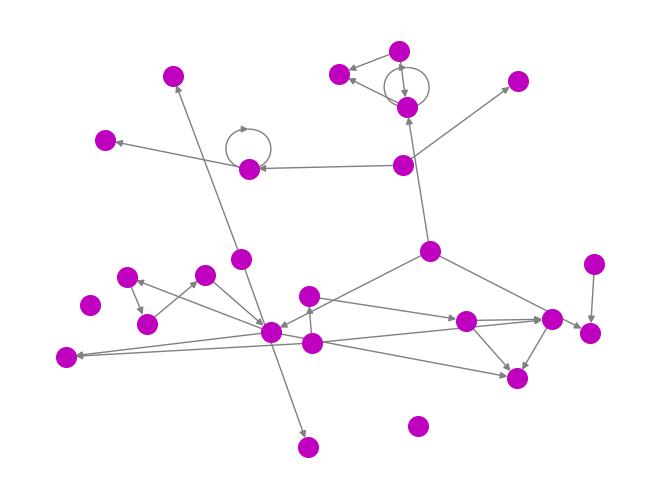

In [23]:
nx.draw(BFF_Network, pos, node_color='m', node_size=200, edge_color='grey', with_labels=False)

This is cool to see, but when we did our first-day exercise, we actually stood in a circle. This is closer to what we saw:

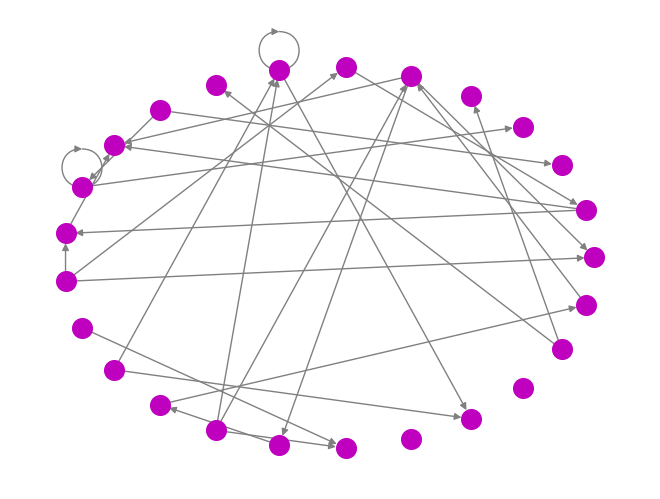

In [24]:
nx.draw(BFF_Network, cir_pos, node_color='m', node_size=200, edge_color='grey', with_labels=False)

## Change parameters of the plot
Try different colors for the `node_color` parameter to see what colors you can use. Google "matplotlib colors" to see what options you have! For example, `c` is a beautiful cyan color and `k` is black, whereas `r` is red!

The `node_size` parameter will change the size of your nodes!

Change the color of your edges with the `edge_color` parameter

Change the `with_labels` parameter to view labels.

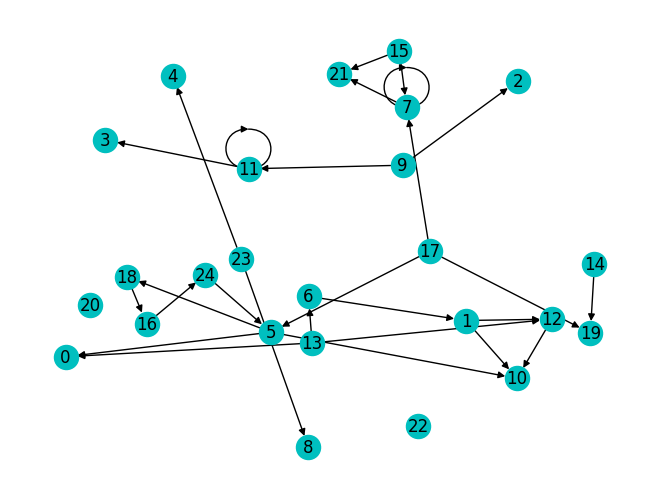

In [25]:
nx.draw(BFF_Network, pos, node_color='c', node_size=300, edge_color='black', with_labels=True)

## Labeling Nodes using `networkx`

It might be nice to label nodes according to their names, so that when we plot a network we see names instead of IDs!

The way to do that is by defining a _dictionary_ object that defines what to label each node.

A dictionary is a python object that acts as a way to "lookup" the meaning of things. Dictionaries are defined by _key, value_ pairs. 

I like to think of dictionaries in the following way: if I had a secret language I wanted to use to communicate with a friend, I would also have to provide the decoder to them.

For example, I could ask my friend, "Good jeans plant man?", and then provide a decoder, or a _**dictionary**_ that looked like `decoder = {'jeans': 'are', 'plant': 'you, 'good': 'how', 'man': 'today'}`. My friend could then use the dictionary to decode the message by looking up the words I gave them in the dictionary: `print(decoder['good'], decoder['jeans'], decoder['plant'], decoder['man'], '?')`

In [26]:
decoder = {'jeans': 'are', 
           'plant': 'you', 
           'good': 'how', 
           'man': 'today'}
print(decoder['good'], decoder['jeans'], decoder['plant'], decoder['man'], '?')

how are you today ?


In [27]:
name_dictionary = {
    0: "Chelpang",
    1: "Kavina",
    2: "Grace",
    3: "David",
    4: "Tianyu",
    5: "Andrew",
    6: "Alexandra",
    7: "Mariia",
    8: "Dominic",
    9: "Breanna",
    10: "Peter",
    11: "Ha",
    12: "Tim",
    13: "Charles",
    14: "Nathan",
    15: "Isaac",
    16: "Finn",
    17: "Dylan",
    18: "Christopher",
    19: "Nina",
    20: "Nicholas Sliter",
    21: "Nick Smith",
    22: "Hedavam",
    23: "Zoe",
    24: "Masa"
}

Alternatively, the following code does the exact same thing. It's a bit more complicated so don't worry if you don't understand what's happening. I'm mostly putting it here so you can reference it in the future if you'd like to. 

In [28]:
students = [ "Chelpang", "Kavina", "Grace", "David", "Tianyu", "Andrew", "Alexandra", "Mariia",
    "Dominic", "Breanna", "Peter", "Ha", "Tim", "Charles", "Nathan", "Isaac", "Finn", "Dylan", 
            "Christopher", "Nina", "Nicholas Sliter", "Nick Smith", "Hedavam", "Zoe", "Masa"]
name_dictionary = { i : students[i] for i in range(0, len(students) ) }

Now, we need to redefine the network with our new labels, _and_ redefine the positions of our nodes, now that they have different names. 

In [29]:
BFF_Network = nx.relabel_nodes(BFF_Network, name_dictionary)
pos = nx.spring_layout(BFF_Network, k=.5)

In the following code chunk, I'm doing two things we haven't done before: 
* redefining the size of the figure that we're plotting our network on using `plt.figure`
* changing the size of the font that we're labeling our nodes with using `font_size`

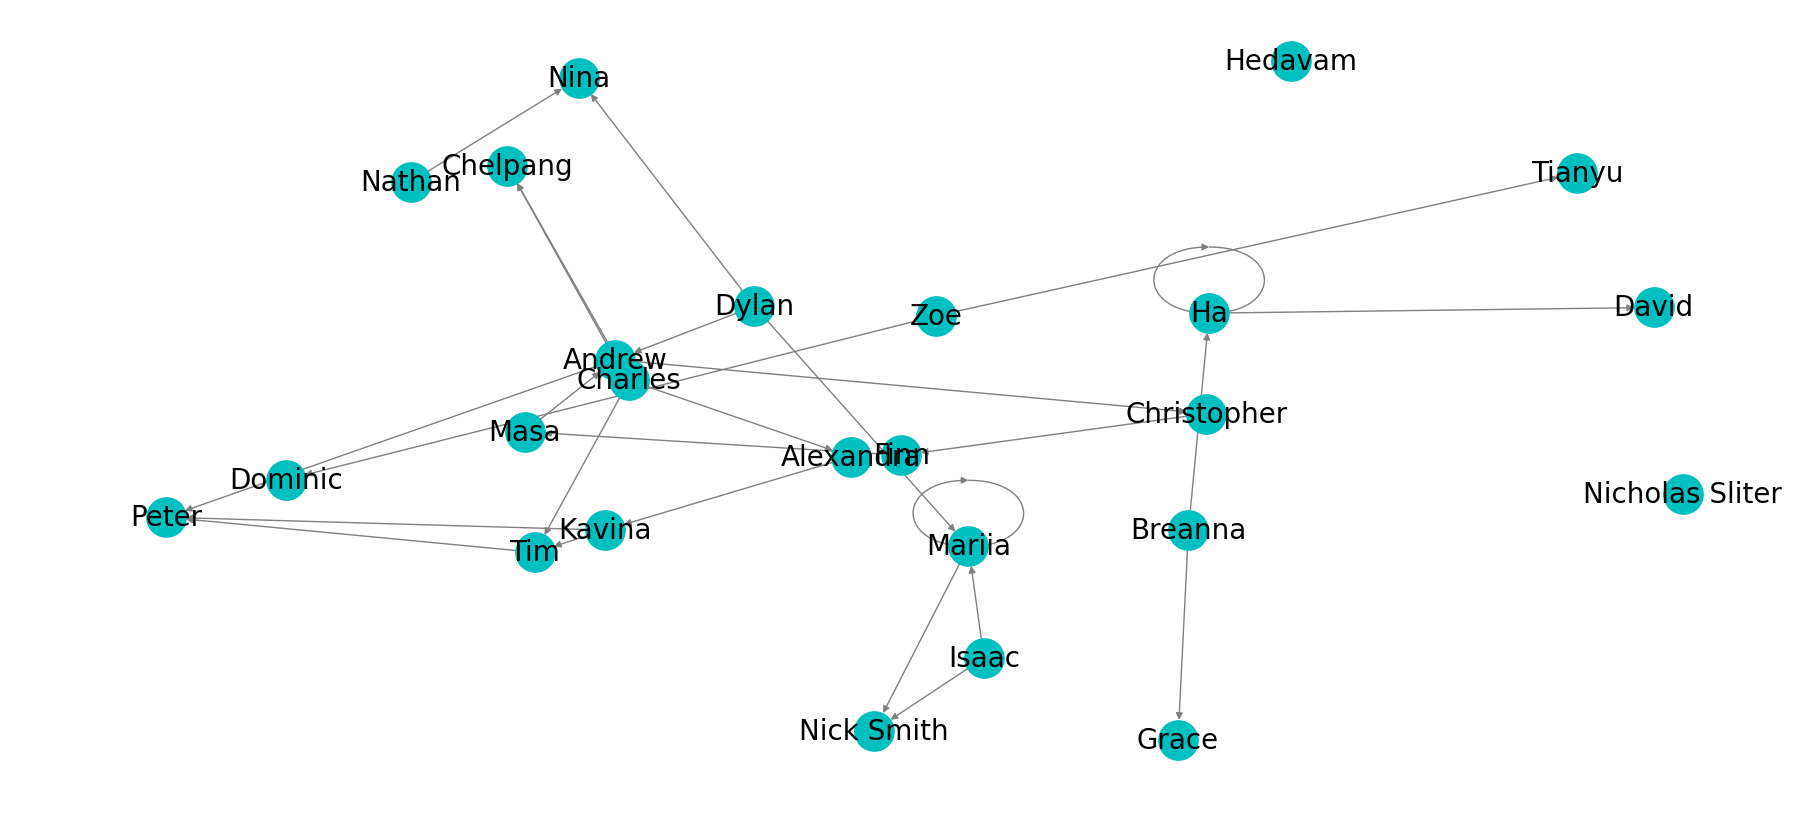

In [30]:
plt.figure(figsize = (18,8) )
nx.draw(BFF_Network, pos, node_color='c', node_size=800, edge_color='grey', with_labels=True, font_size = 20)

## Change colors of just a few nodes
There are `len(CG_Adjacency)` nodes in the network, so we'll make a list of one color, and then change some of the values corresponding to the nodes we want to change!

To do so, we have to make a list the length of the number of nodes in the graph/network. Then we specify the color of each node based on the color in the list. 

In [31]:
len(BFF_Adjacency)

25

In [32]:
colors = ['c'] * len(BFF_Adjacency)
colors[0] = 'm'
colors[11:14] = ['m']*3

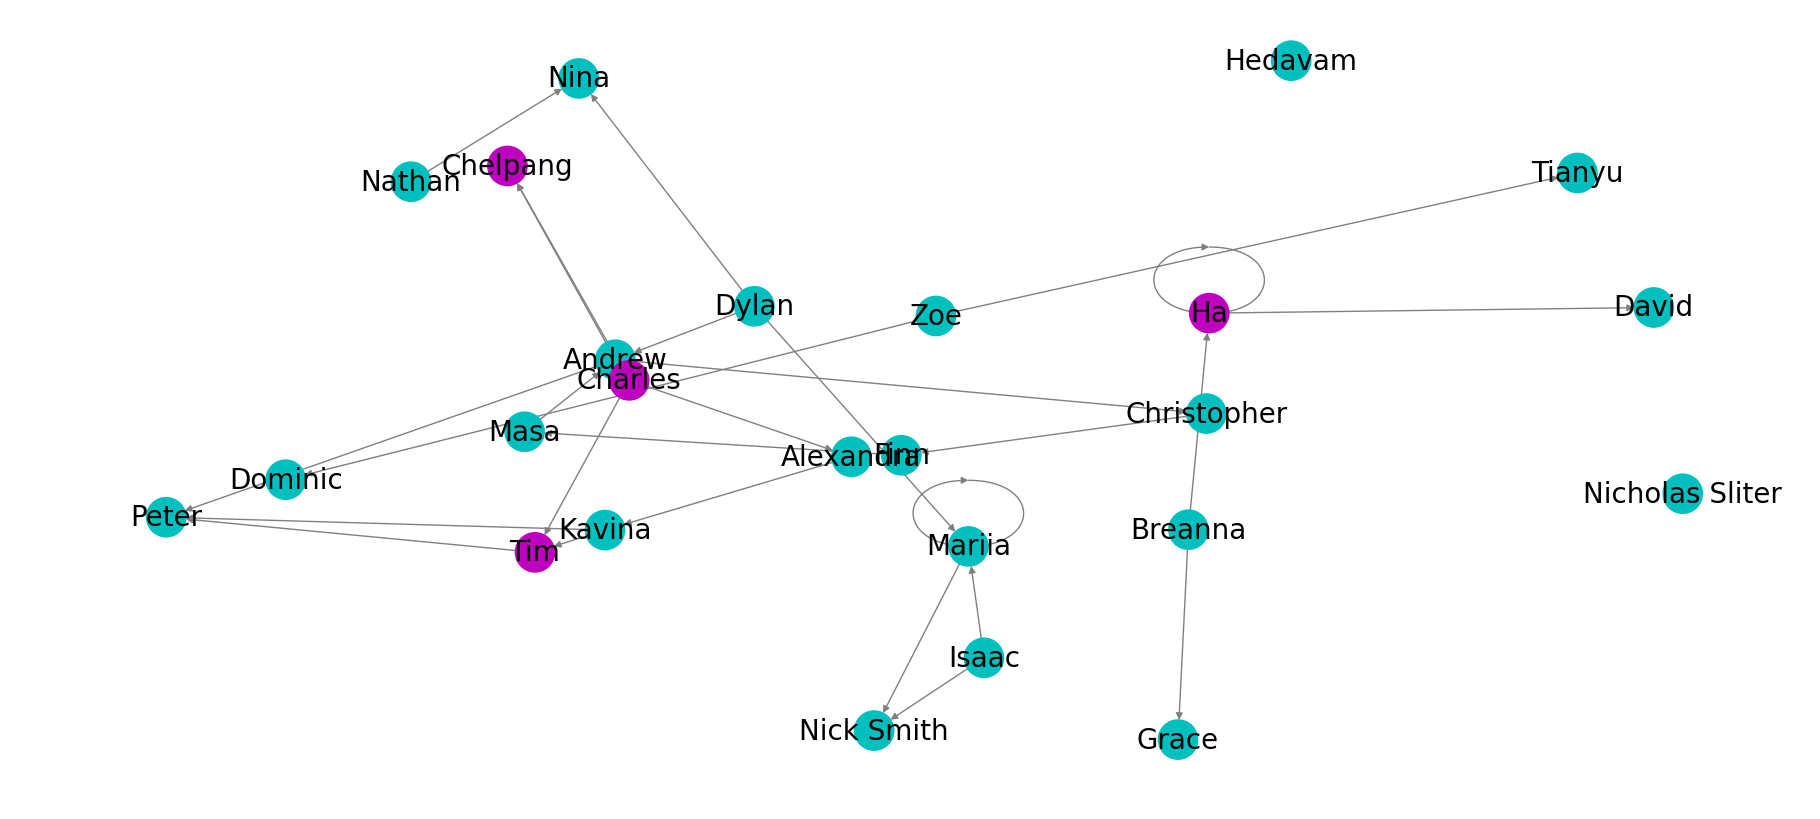

In [33]:
plt.figure(figsize = (18,8) )
nx.draw(BFF_Network, pos, node_color=colors, node_size=800, edge_color='grey', with_labels=True, font_size = 20)

# TASK 
Plot the friendship network from the first activity. Make sure you label the nodes with their names and give them all a pretty colour.

In [35]:
folder = ""
file = "friends"
ext = ".csv"
friends_Adjacency = np.genfromtxt( folder+file+ext )
print(BFF_Adjacency)

np.savetxt('friends.csv', friends_Adjacency)

friends_Network = nx.from_numpy_array(friends_Adjacency, create_using=nx.DiGraph)

#friends_Network = nx.to_networks_graph(friends_Adjacency, create_using=nx.DiGraph)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [36]:
pos = nx.spring_layout(friends_Network, k=0.5)
cir_pos = nx.circular_layout(friends_Network)

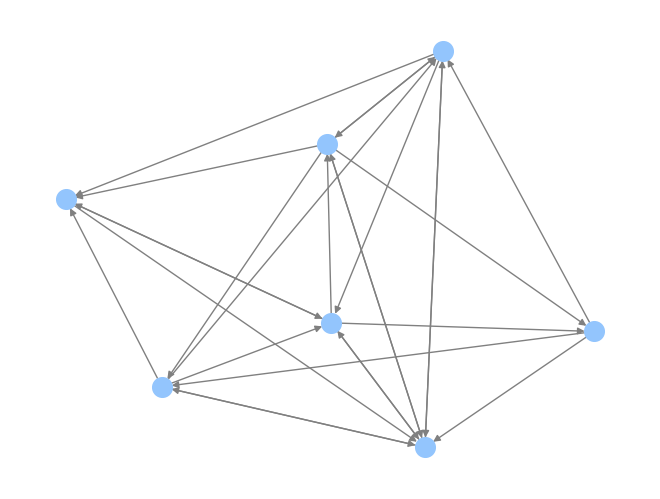

In [37]:
nx.draw(friends_Network, pos, node_color='#93c5fd', node_size=200, edge_color='grey', with_labels=False)

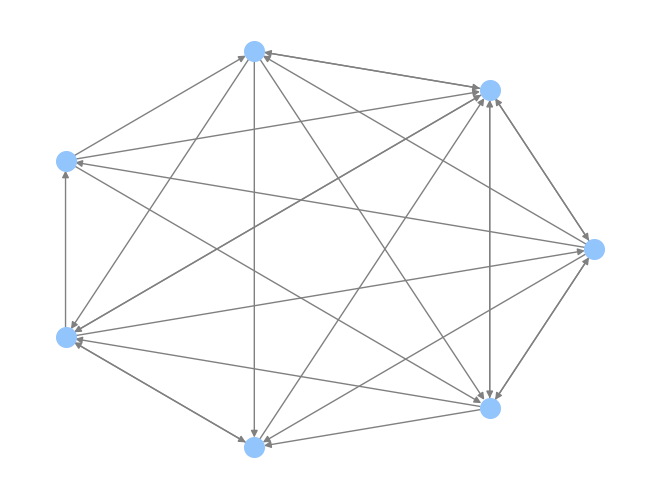

In [38]:
nx.draw(friends_Network, cir_pos, node_color='#93c5fd', node_size=200, edge_color='grey', with_labels=False)

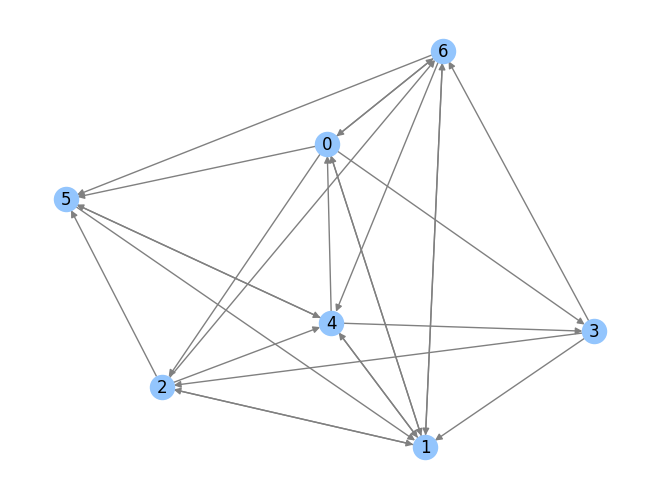

In [39]:
nx.draw(friends_Network, pos, node_color='#93c5fd', node_size=300, edge_color='grey', with_labels=True)

In [40]:
name_dictionary = {
    0: "Felicity",
    1: "Solomon",
    2: "Bradley",
    3: "Minton",
    4: "Silus",
    5: "Shauna",
    6: "Merika",
}

In [41]:
friends_Network = nx.relabel_nodes(friends_Network, name_dictionary)
pos = nx.spring_layout(friends_Network, k=.5)

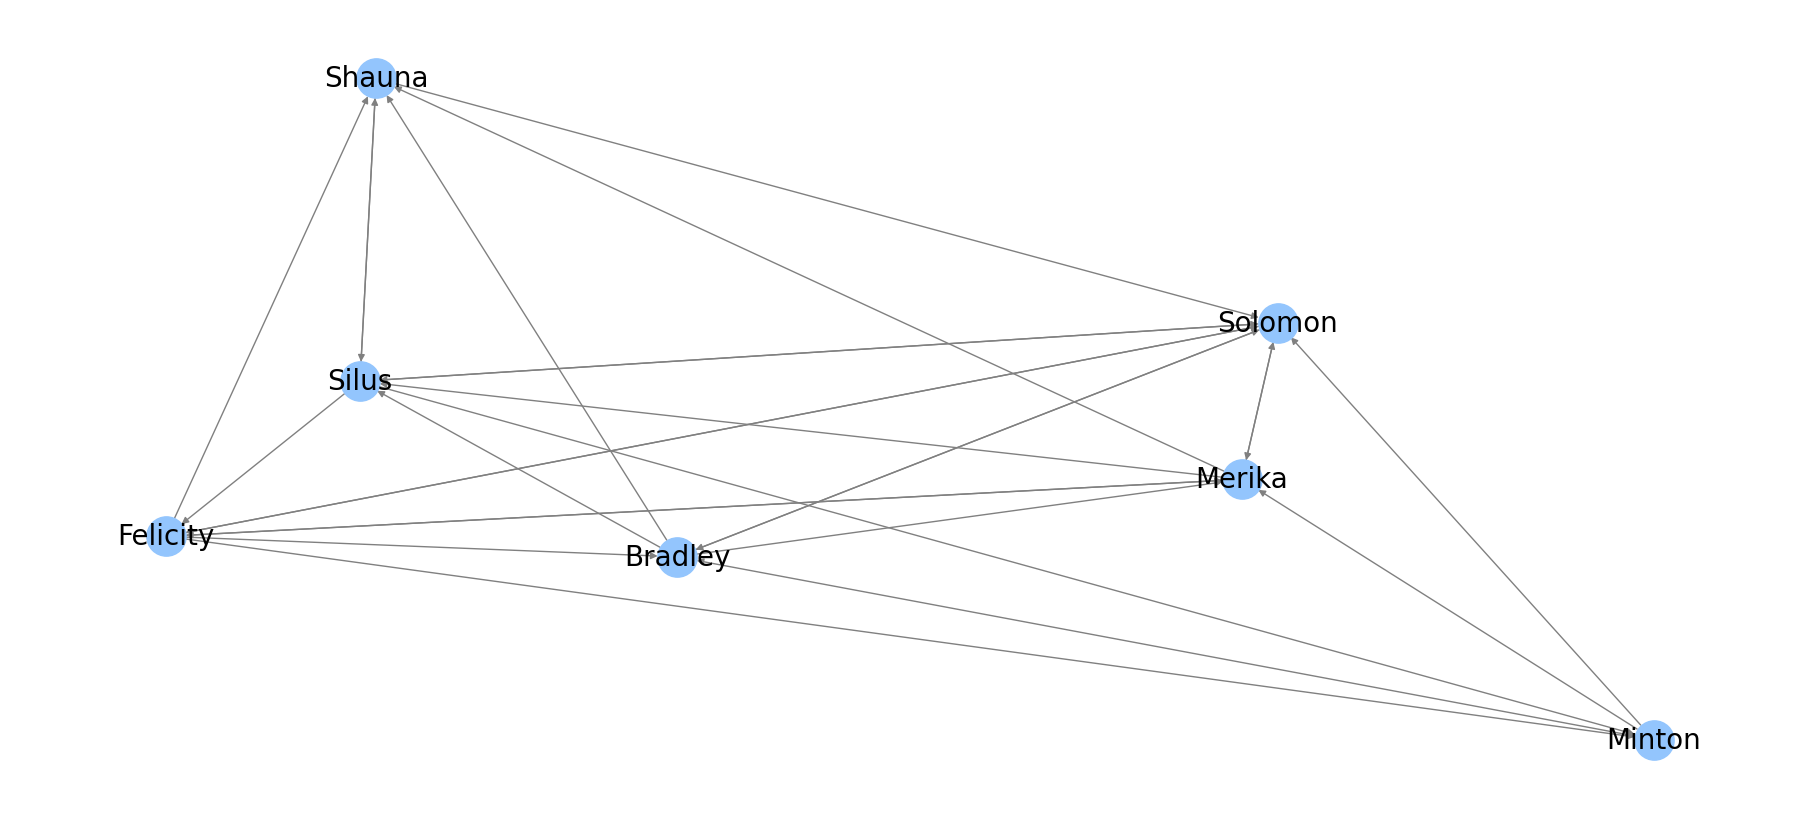

In [42]:
plt.figure(figsize = (18,8) )
nx.draw(friends_Network, pos, node_color='#93c5fd', node_size=800, edge_color='grey', with_labels=True, font_size = 20)

### _Challenge Part II_
We don't _need_ to redefine the position of the nodes now that they're renamed. Figure out a way to use the same position of the nodes as when we were plotting them according to their numbers. 

_Hint_: look up what type of object the function `spring_layout` returns

### _Challenge Part III_
I generated the BFF network for our class by independently assigning each person an out degree $d_{out}$ of 0, 1, 2, or 3, with equal probability. Then, I chose $d_{out}$ best friends from the class list uniformly at random (without replacement). Generate a new BFF network for our class using the same process. Then, plot and save this graph.

# Great work!
That's it for today!

**Write your name at the top of this notebook, save it, and upload it to your GitHub** Then tag `@izabel-aguiar` in the commit.

Please come to office hours on Thursday if you have any questions about anything we went over today-- it'll be important to understand for next week's Computer Lab, as well as for the final project. 

### _Challenge Part IV_
* Read about [Erd&ouml;s R&eacute;nyi Graphs](https://en.wikipedia.org/wiki/Erdős–Rényi_model)
* Figure out how the `erdos_renyi_graph` funciton works on [networkx](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html)
* Generate and plot an Erd&ouml;s-R&eacute;nyi graph with 500 nodes whose edge probability is $0.3$ and plot it
* Generate and plot an Erd&ouml;s-R&eacute;nyi graph with 500 nodes whose edge probability is $0.03$ and plot it